# Read Atlantic or Epac storm data from IBTRacS and plot histograms for TC categories


## NCSU Tropical and Large Scale Dynamics

Anantha Aiyyer


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr


dataDir  = "./"
filename = "IBTrACS.since1980.v04r00.nc"


# select basin
# for this code choose only NA or EP
basinWant = str.encode("EP")

# select year range
year1 = 1995
year2 = 2019

file = dataDir+filename

try:
    ds = xr.open_dataset(file)
except:
    print ("file not found. quitting code")
    quit()
    
print ("Ibtracs file found and opened")



Ibtracs file found and opened


In [2]:
# subset the storms based on the basin and years
years = pd.to_datetime(ds.time[:,0].values).year
inds = np.where( (ds.basin[:,0] == basinWant) & (years>=year1) & (years<=year2))[0]


In [3]:
#The variable usa_sshs contains the storm category for the USA defined EP and NA basins 
sshs     = ds.usa_sshs[inds,:]
max_sshs = sshs.max(dim='date_time',skipna=True)
stormYears = pd.to_datetime(ds.time[inds,0].values).year
print(stormYears)

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', length=487)


# Use pandas and seaborn for histogram

SS
-1.0     73
 0.0    192
 1.0     73
 2.0     37
 3.0     30
 4.0     65
 5.0     16
Name: SS, dtype: int64


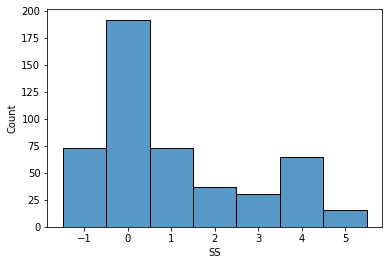

In [4]:
# Now create a pandas dataframe for easy histogram plot
# omit categories less than -2 
df = pd.DataFrame({'SS':  max_sshs.where(max_sshs > -2, drop=True)})

#print (df.SS.value_counts(dropna=False))
print(df.groupby(['SS'])['SS'].count())



# use seaborn for the plot
sns.histplot(data=df, x="SS", discrete=True)
plt.show()


# Some additional info - for example, names of cat5 storms

In [7]:
StormNames  = ds.name[inds]
StormDates  = ds.time[inds,0]

# list the names and years of category 5 storms

icat = 5
cat5N = StormNames.where(max_sshs == icat, drop=True).values
cat5Y = pd.to_datetime(StormDates.where(max_sshs == icat, drop=True).values).year

i=0
for y,n in zip(cat5Y,cat5N):
    print(i,y,n.decode())
    i=i+1

0 1997 GUILLERMO
1 1997 OLIWA
2 1997 LINDA
3 1997 PAKA-
4 2002 ELIDA
5 2002 HERNAN
6 2002 KENNA
7 2006 IOKE
8 2009 RICK
9 2010 CELIA
10 2014 GENEVIEVE
11 2014 MARIE
12 2015 PATRICIA
13 2018 LANE
14 2018 WALAKA
15 2018 WILLA
